In [12]:
# Import necessary libraries:
# pandas and numpy for data manipulation
# matplotlib and seaborn for data visualization
# scikit-learn modules for preprocessing, splitting, modeling, and evaluation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
# Load dataset from CSV
# Show first few rows to understand the structure

In [15]:
from google.colab import files

df = pd.read_csv("sustainable_concrete_dataset.csv")
df.head()

,cement,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength,embodied_CO2,energy_consumption,resource_consumption
0,312.362036,162.959305,7.851171,1001.810898,771.598763,51,344.476684,307.856482,1628.413117,2256.582173
1,485.214292,187.933066,7.409364,1039.004419,841.629699,71,374.295933,468.240201,2418.001368,2561.190840
2,419.598183,211.106209,27.187637,875.140370,828.048279,48,375.110054,436.206645,2476.993640,2361.080677
3,379.597545,201.255742,7.486386,987.462230,646.169971,19,473.843719,369.537736,1928.200394,2221.971875
4,246.805592,206.459280,8.158492,971.523795,644.774841,262,132.713930,246.983875,1329.311329,2077.722000


In [16]:
# Explore the dataset:
# shows column data types and non-null counts
# provides summary statistics (mean, std, min, max, etc.)
# checks for missing values in each column

In [17]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1000 non-null   float64
 1   water                 1000 non-null   float64
 2   superplasticizer      1000 non-null   float64
 3   coarse_aggregate      1000 non-null   float64
 4   fine_aggregate        1000 non-null   float64
 5   age                   1000 non-null   int64  
 6   compressive_strength  1000 non-null   float64
 7   embodied_CO2          1000 non-null   float64
 8   energy_consumption    1000 non-null   float64
 9   resource_consumption  1000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.3 KB


,0
cement,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
compressive_strength,0
embodied_CO2,0
energy_consumption,0
resource_consumption,0


In [18]:
# Visualize feature correlations:
# Creates a heatmap to see how each feature is correlated with others,
# which helps identify important predictors and multicollinearity.

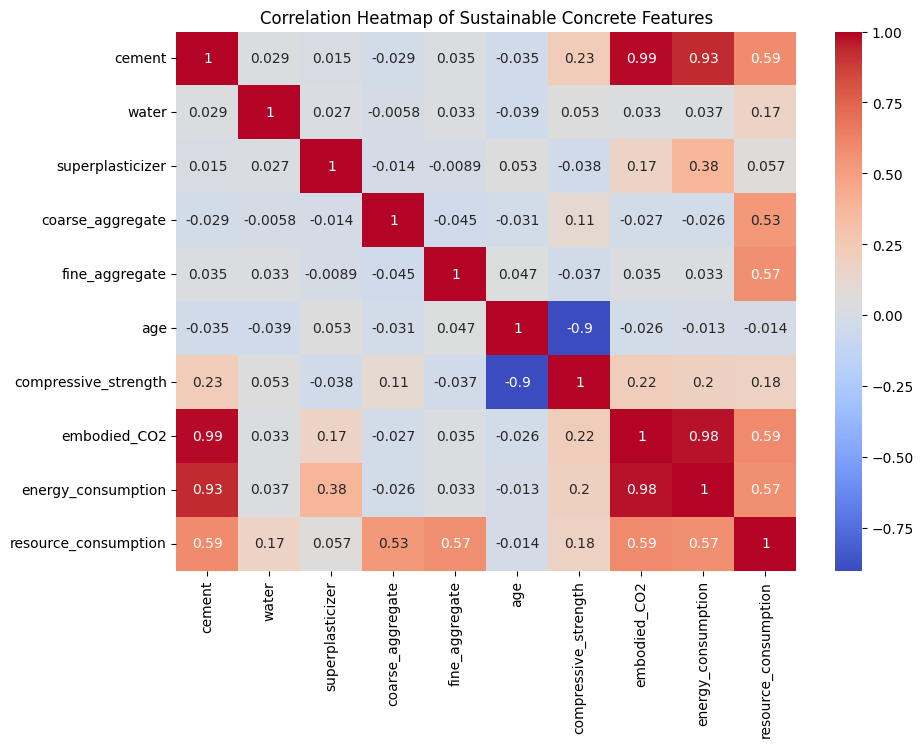

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Sustainable Concrete Features")
plt.show()

In [20]:
# Plot histograms of all features:
# Helps understand the distribution of each variable,
# detect skewness, outliers, and general data patterns.

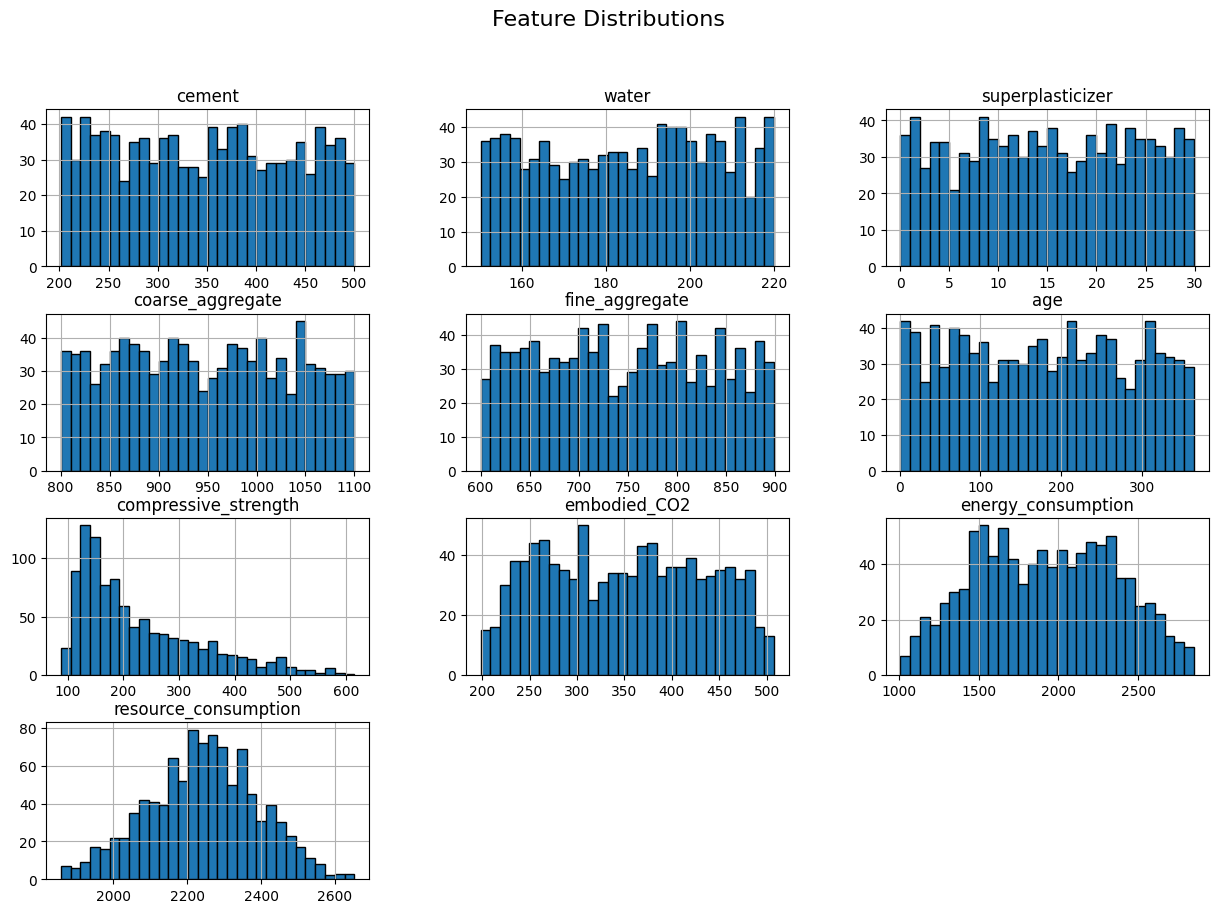

In [21]:
df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [22]:
# Scatter plot of cement vs compressive strength:
# Visualizes the relationship between cement amount and the target variable,
# helping to see if there's a linear trend.

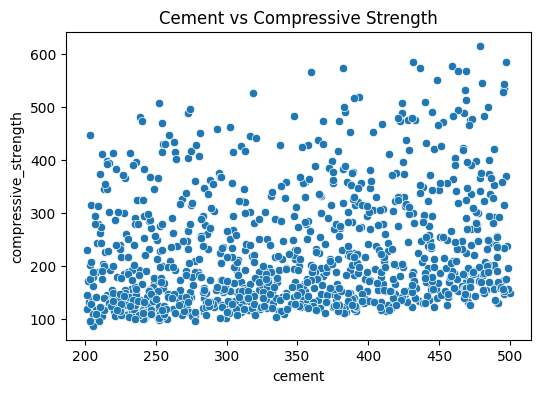

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['cement'], y=df['compressive_strength'])
plt.title("Cement vs Compressive Strength")
plt.show()

In [24]:
# Features and target split:
# X contains all input features (independent variables) by dropping the target column.
# y contains the target variable 'compressive_strength' that we want to predict.

In [25]:
X = df.drop('compressive_strength', axis=1)
y = df['compressive_strength']

In [35]:
# Split the dataset into training and testing sets:
# 80% of the data is used to train the models (X_train, y_train)
# 20% of the data is used to evaluate model performance (X_test, y_test)
# random_state ensures reproducibility of the split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create and train a linear regression model on the training data
# model.fit() finds the best-fit line by minimizing the mean squared error

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Evaluate the final model on the test set and print the Mean Squared Error and R² score

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1677.8973319782508
R^2 Score: 0.8606114302437616


In [39]:
# Visualize model performance: scatter plot of actual vs predicted compressive strength
# Points close to the red dashed line (y = x) indicate accurate predictions

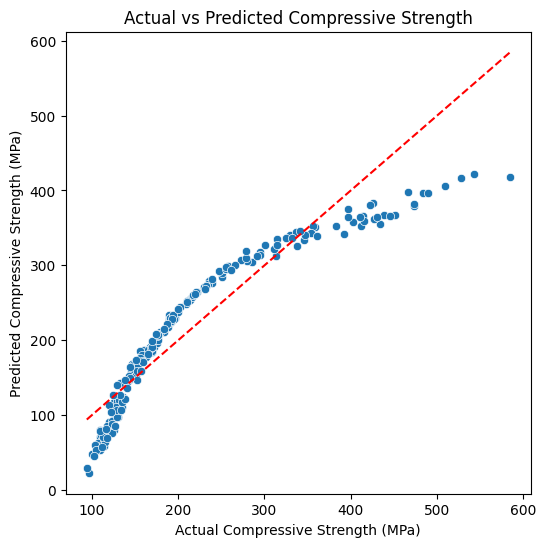

In [40]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Compressive Strength (MPa)")
plt.ylabel("Predicted Compressive Strength (MPa)")
plt.title("Actual vs Predicted Compressive Strength")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

In [41]:
# Display feature importance via linear regression coefficients
# Bar plot shows the magnitude and direction of each feature's impact on predicted compressive strength
# (largest absolute coefficients = most influential features)

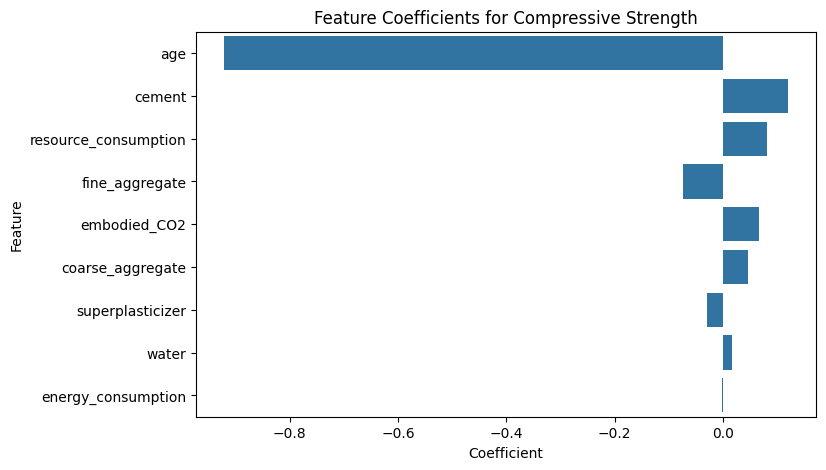

,Feature,Coefficient
5,age,-0.920884
0,cement,0.119950
8,resource_consumption,0.081110
4,fine_aggregate,-0.073264
6,embodied_CO2,0.066674
3,coarse_aggregate,0.047099
2,superplasticizer,-0.029950
1,water,0.017274
7,energy_consumption,-0.002266


In [42]:
# Coefficients for Linear Regression
coefficients = model.coef_
features = X.columns

# Combine into a DataFrame
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Coefficients for Compressive Strength")
plt.show()

# Optional: display the table
coef_df

In [43]:
# Train a Random Forest Regressor (200 trees) and evaluate its performance on the test set
# Returns MSE and R² score – generally expected to outperform simple Linear Regression for this dataset

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Scores
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

rf_mse, rf_r2

(108.09543976625008, 0.9910201485758221)

In [44]:
# Extract and display feature importances from the trained Random Forest model
# Higher values indicate features that contribute most to predicting compressive strength

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns

df_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

df_importances

,Feature,Importance
5,age,0.937385
0,cement,0.024629
6,embodied_CO2,0.012035
8,resource_consumption,0.010222
7,energy_consumption,0.007182
3,coarse_aggregate,0.004530
4,fine_aggregate,0.001529
2,superplasticizer,0.001304
1,water,0.001183


In [45]:
# Horizontal bar plot of Random Forest feature importances (highest impact at the top)

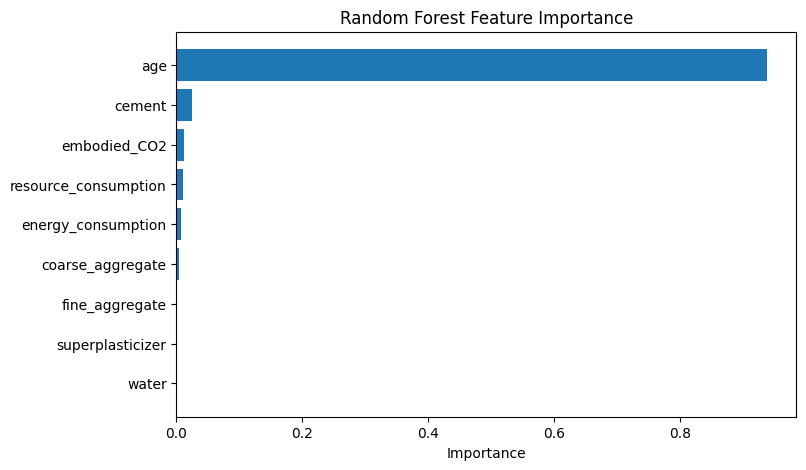

In [33]:
plt.figure(figsize=(8,5))
plt.barh(df_importances['Feature'], df_importances['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [46]:
# Save the trained model to a file and trigger download (Colab only)
# File: concrete_strength_model.joblib – ready for loading in the Flask app or future use

In [34]:
import joblib
from google.colab import files

# Save the model
joblib.dump(model, 'concrete_strength_model.joblib')

# Download to your computer
files.download('concrete_strength_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>